#AI Hangman

## Simple Heuristic AI Model

Target word: ______ (Length: 6)

AI guesses: e
Revealed Structure: ______
Correct guesses: []
Incorrect guesses: ['e']

AI guesses: a
Revealed Structure: ____a_
Correct guesses: ['a']
Incorrect guesses: ['e']

AI guesses: l
Revealed Structure: __l_a_
Correct guesses: ['a', 'l']
Incorrect guesses: ['e']

AI guesses: o
Revealed Structure: __l_a_
Correct guesses: ['a', 'l']
Incorrect guesses: ['e', 'o']

AI guesses: i
Revealed Structure: __lia_
Correct guesses: ['a', 'i', 'l']
Incorrect guesses: ['e', 'o']

AI guesses: j
Revealed Structure: j_lia_
Correct guesses: ['a', 'i', 'j', 'l']
Incorrect guesses: ['e', 'o']

AI guesses: n
Revealed Structure: j_lian
Correct guesses: ['a', 'i', 'j', 'l', 'n']
Incorrect guesses: ['e', 'o']

AI guesses: u
Revealed Structure: julian
Correct guesses: ['a', 'i', 'j', 'l', 'n', 'u']
Incorrect guesses: ['e', 'o']

AI WON! The word is 'julian' with 2 mistake(s).





Target word: _____ (Length: 5)

AI guesses: e
Revealed Structure: _e_e_
Correct guesses: ['e

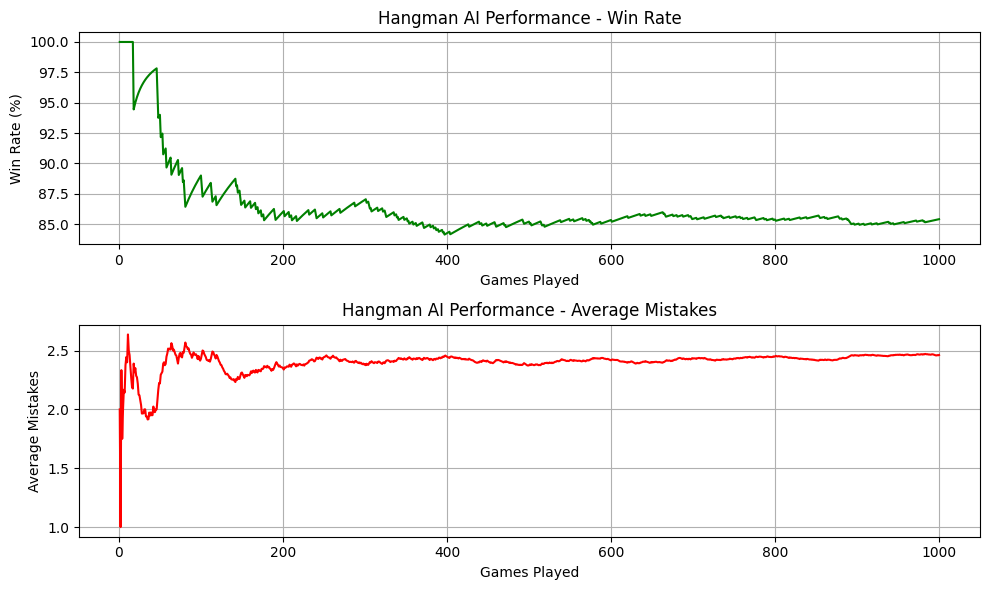

Games Played: 1000
Win Rate: 85.40%
Average Mistakes: 2.46


In [ ]:
import random
import matplotlib.pyplot as plt

def hangman_ai(revealed_structure, correct_guesses, incorrect_guesses, dictionary):
    # Step 1: Relaxed word filtering using the full dictionary
    filtered_words = [
        word for word in dictionary
        if len(word) == len(revealed_structure) and
        all(word[i] == revealed_structure[i] or revealed_structure[i] == "_" for i in range(len(word))) and
        not any(letter in word for letter in incorrect_guesses)
    ]

    if not filtered_words:
        return None

    # Step 2: Frequency analysis of unguessed letters
    letter_frequency = {}
    common_letters = "etaoinshrdlu"  # Most common English letters
    for word in filtered_words:
        for letter in word:
            if letter not in correct_guesses and letter not in incorrect_guesses:
                letter_frequency[letter] = letter_frequency.get(letter, 0) + 1

    if not letter_frequency:
        return None

    # Sort by frequency and prioritize common letters
    sorted_letters = sorted(letter_frequency.items(),
                            key=lambda x: (-x[1], common_letters.find(x[0])))


    # Step 3: Select the letter with the highest priority
    return sorted_letters[0][0]

# Simulation game to test Hangman AI, consist of verbose and plot
def simulate_game(word, max_mistakes=6, dictionary=None, verbose=False):
    revealed_structure = "_" * len(word)
    correct_guesses = set()
    incorrect_guesses = set()
    mistakes = 0

    if verbose:
        print(f"Target word: {'_' * len(word)} (Length: {len(word)})\n")

    while mistakes < max_mistakes and "_" in revealed_structure:
        guess = hangman_ai(revealed_structure, correct_guesses, incorrect_guesses, dictionary)
        if not guess:
            break

        if guess in word:
            correct_guesses.add(guess)
            revealed_structure = "".join(
                [guess if word[i] == guess else revealed_structure[i] for i in range(len(word))]
            )
        else:
            incorrect_guesses.add(guess)
            mistakes += 1

        if verbose:
            print(f"AI guesses: {guess}")
            print(f"Revealed Structure: {revealed_structure}")
            print(f"Correct guesses: {sorted(correct_guesses)}")
            print(f"Incorrect guesses: {sorted(incorrect_guesses)}\n")

    result = {
        "word": word,
        "win": "_" not in revealed_structure,
        "mistakes": mistakes
    }

    if verbose:
        if result["win"]:
            print(f"AI WON! The word is '{word}' with {mistakes} mistake(s).\n")
            print("\n")
            print("\n")
        else:
            print(f"AI LOST! The word was '{word}'.\n")
            print("\n")
            print("\n")

    return result

# Test AI and collect results
def test_ai(dictionary, num_games=100, max_mistakes=6, verbose_games=3): # Number of games played = 100, with 3 verbose games
    results = {
        "games_played": 0,
        "wins": 0,
        "total_mistakes": 0,
        "win_rates": [],
        "avg_mistakes": []
    }

    for game_number in range(num_games):
        verbose = game_number < verbose_games
        word = random.choice(dictionary)
        game_result = simulate_game(word, max_mistakes, dictionary, verbose)

        results["games_played"] += 1
        if game_result["win"]:
            results["wins"] += 1
        results["total_mistakes"] += game_result["mistakes"]

        win_rate = (results["wins"] / results["games_played"]) * 100
        avg_mistakes = results["total_mistakes"] / results["games_played"]
        results["win_rates"].append(win_rate)
        results["avg_mistakes"].append(avg_mistakes)

    return results



# Plot results
def plot_results(results):
    if not results:
        print("Error: Results are None!")
        return

    plt.figure(figsize=(10, 6))

    # Plot win rate
    plt.subplot(2, 1, 1)
    plt.plot(range(1, results["games_played"] + 1), results["win_rates"], label="Win Rate", color='green')
    plt.xlabel('Games Played')
    plt.ylabel('Win Rate (%)')
    plt.title('Hangman AI Performance - Win Rate')
    plt.grid(True)

    # Plot average mistakes
    plt.subplot(2, 1, 2)
    plt.plot(range(1, results["games_played"] + 1), results["avg_mistakes"], label="Average Mistakes", color='red')
    plt.xlabel('Games Played')
    plt.ylabel('Average Mistakes')
    plt.title('Hangman AI Performance - Average Mistakes')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    print(f"Games Played: {results['games_played']}")
    print(f"Win Rate: {results['win_rates'][-1]:.2f}%")
    print(f"Average Mistakes: {results['avg_mistakes'][-1]:.2f}")

if __name__ == "__main__":
    with open("google-10000-english.txt", "r") as file:
        dictionary = file.read().splitlines()

    results = test_ai(dictionary, num_games=1000, max_mistakes=6, verbose_games=3)
    plot_results(results)


## Deep learining AI Model

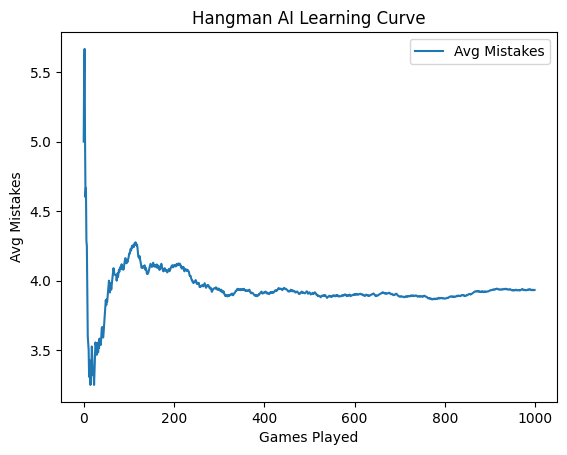

Games Played: 1000
Win Rate: 65.80%
Avg Mistakes: 3.93


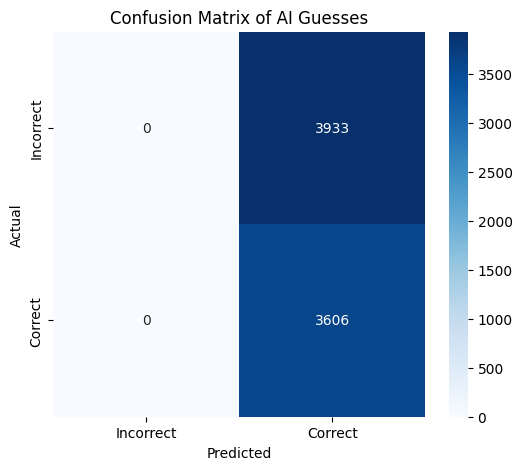

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

class HangmanRLAgent:
    def __init__(self, dictionary):
        self.dictionary = dictionary
        self.letter_rewards = {chr(i): (5 if chr(i) in "etaoinshrdlucmfwypvbgkjqxz"[:6] else 1) for i in range(97, 123)}
        self.letter_counts = {chr(i): 1 for i in range(97, 123)}  # Does not allow division by zero
        self.epsilon = 0.05  # This is to reduce the exploration rate

    def choose_letter(self, revealed_structure, correct_guesses, incorrect_guesses):
        valid_letters = [l for l in self.letter_rewards.keys() if l not in correct_guesses | incorrect_guesses]
        if not valid_letters:
            return None

        # Filter words that match the revealed structure
        filtered_words = [word for word in self.dictionary if len(word) == len(revealed_structure) and
                          all(word[i] == revealed_structure[i] or revealed_structure[i] == "_" for i in range(len(word)))]

        # Letter frequency in filtered words
        letter_freq = {letter: 0 for letter in valid_letters}
        for word in filtered_words:
            for letter in word:
                if letter in valid_letters:
                    letter_freq[letter] += 1

        # Epsilon-greedy exploration
        if random.random() < self.epsilon:
            return random.choice(valid_letters)

        # Select letter with the highest frequency in possible words
        best_letter = max(letter_freq, key=letter_freq.get)
        return best_letter

    def update_rewards(self, letter, success):
        if success:
            self.letter_rewards[letter] += 2  # The reward for correct guesses
        else:
            self.letter_rewards[letter] -= 0.1  # Penalty for incorrect guesses
        self.letter_counts[letter] += 1  # Will track letter usage


def simulate_game(agent, word, max_mistakes=6, verbose=False):
    revealed_structure = ['_'] * len(word)
    correct_guesses = set()
    incorrect_guesses = set()
    mistakes = 0
    guesses = []
    labels = []

    if verbose:
        print(f"Target word: {''.join(revealed_structure)} (Length: {len(word)})\n")

    while mistakes < max_mistakes and '_' in revealed_structure:
        guess = agent.choose_letter(revealed_structure, correct_guesses, incorrect_guesses)
        if not guess:
            break

        guesses.append(guess)
        labels.append(1 if guess in word else 0)

        if guess in word:
            correct_guesses.add(guess)
            revealed_structure = [guess if word[i] == guess else revealed_structure[i] for i in range(len(word))]
            agent.update_rewards(guess, True)
        else:
            incorrect_guesses.add(guess)
            mistakes += 1
            agent.update_rewards(guess, False)

        if verbose:
            print(f"AI guesses: {guess}")
            print(f"Revealed Structure: {''.join(revealed_structure)}")
            print(f"Correct: {sorted(correct_guesses)} | Incorrect: {sorted(incorrect_guesses)}\n")

    return {"win": '_' not in revealed_structure, "mistakes": mistakes, "guesses": guesses, "labels": labels}


def train_ai(dictionary, num_games=1000, max_mistakes=6): #Training the AI
    agent = HangmanRLAgent(dictionary)
    results = {"games_played": 0, "wins": 0, "mistakes": [], "all_guesses": [], "all_labels": []}

    for _ in range(num_games):
        word = random.choice([w for w in dictionary if 3 <= len(w) <= 6])  # Train on shorter words first
        result = simulate_game(agent, word, max_mistakes)
        results["games_played"] += 1
        if result["win"]:
            results["wins"] += 1
        results["mistakes"].append(result["mistakes"])
        results["all_guesses"].extend(result["guesses"])
        results["all_labels"].extend(result["labels"])

    return agent, results


def plot_results(results):
    plt.plot(range(len(results["mistakes"])), np.cumsum(results["mistakes"]) / np.arange(1, len(results["mistakes"]) + 1), label="Avg Mistakes")
    plt.xlabel("Games Played")
    plt.ylabel("Avg Mistakes")
    plt.title("Hangman AI Learning Curve")
    plt.legend()
    plt.show()

    print(f"Games Played: {results['games_played']}")
    print(f"Win Rate: {results['wins'] / results['games_played'] * 100:.2f}%")
    print(f"Avg Mistakes: {np.mean(results['mistakes']):.2f}")

    # Plot confusion matrix
    cm = confusion_matrix(results["all_labels"], [1 if g in results["all_guesses"] else 0 for g in results["all_guesses"]])
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Incorrect", "Correct"], yticklabels=["Incorrect", "Correct"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix of AI Guesses")
    plt.show()


if __name__ == "__main__":
    with open("google-10000-english.txt", "r") as file:
        dictionary = file.read().splitlines()

    trained_agent, game_results = train_ai(dictionary, num_games=1000)
    plot_results(game_results)
